In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import gzip
import struct
import os
import matplotlib.pyplot as plt
import seaborn as sns
def read_idx(MNIST):
    with gzip.open(MNIST, 'rb') as f:
        zero, data_type, dims= struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4)) [0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Step 1: Data Acquisition and Visualization

In [2]:
#Specifying the folder path
folder_path = 'mnist'

#Constructing the full file paths for the MNIST dataset
train_images_path = os.path.join(folder_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(folder_path, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(folder_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(folder_path, 't10k-labels-idx1-ubyte.gz')

In [3]:
#Reading the datasets using the provided function
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels_path)
test_images = read_idx(test_images_path)
test_labels = read_idx(test_labels_path)

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
#Printing the shape of the training images array
print(f'Train Images Shape: {train_images.shape}')
#Printing the shape of the training labels array
print(f'Train Labels Shape: {train_labels.shape}')
#Printing the shape of the testing images array
print(f'Test Images Shape: {test_images.shape}')
#Printing the shape of the testing labels array
print(f'Test Labels Shape: {test_labels.shape}')

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [6]:
#Generating a random index within the range of indices for the test_images array
random_index = np.random.randint(0, len(test_images))

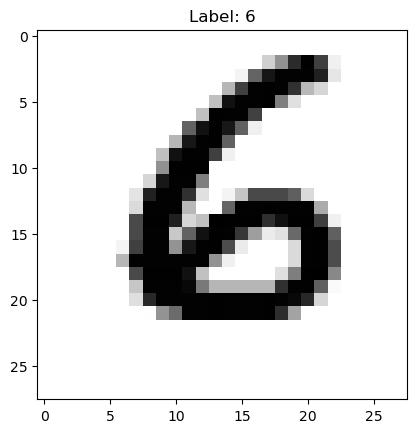

In [7]:
#Displaying a visual representation of a random sample from the test dataset using imshow
plt.imshow(test_images[random_index], cmap='binary')
plt.title(f'Label: {test_labels[random_index]}')

#Displaying the plot
plt.show()

In [8]:
#Generating a random index within the range of indices for the train_images array
random_index = np.random.randint(0, len(train_images))

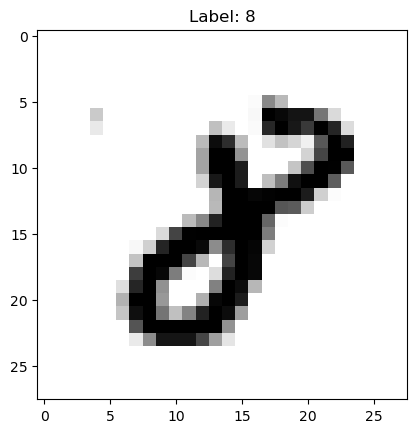

In [9]:
#Displaying a visual representation of a random sample from the train dataset using imshow
plt.imshow(train_images[random_index], cmap='binary')
plt.title(f'Label: {train_labels[random_index]}')

#Displaying the plot
plt.show()

# Step 2: Data preprocessing

In [10]:
#Normalizing the pixel values to be between 0 and 1
normalized_images = train_images / 255.0

In [11]:
#Selecting a random index
random_index = np.random.randint(0, len(normalized_images))

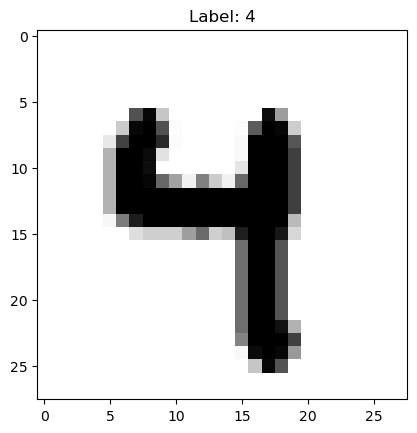

In [12]:
#Displaying a visual representation of a random sample from the normalized images using imshow
plt.imshow(normalized_images[random_index], cmap='binary', vmin=0, vmax=1)
plt.title(f'Label: {train_labels[random_index]}')

#Displaying the plot
plt.show()

In [13]:
#Conerting the labels from categorical data into numerical value using one-hot encoding
num_classes = 10  

#Using the eye function in numpy
one_hot_labels = np.eye(num_classes)[train_labels]

In [14]:
np.eye(random_index)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

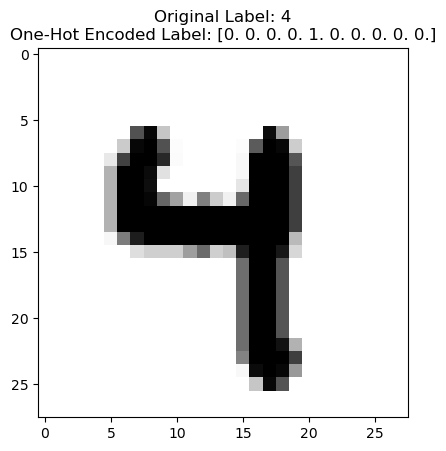

In [15]:
#Displaying a visual representation of a random sample from the normalized images using imshow
plt.imshow(normalized_images[random_index], cmap='binary', vmin=0, vmax=1)
plt.title(f'Original Label: {train_labels[random_index]}\nOne-Hot Encoded Label: {one_hot_labels[random_index]}')

#Displaying the plot
plt.show()

# Step 3: Network Initialization

Sigmoid function

In [16]:
#Defining a sigmoid function that applies the logistic sigmoid activation to the input 'x'
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Sigmoid derivative

In [17]:
#Defining the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Softmax function

In [18]:
#Defining the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True)) 
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

Initialize all the parameters in neural network uniformly. In this network, the input size is 784
dimensions (each input is a 28x28 image, so you have to flatten the data from 2D to 1D). For the
two linear hidden layers, we have 128 and 64 neurons respectively. For the output layer, its size
will be 10 since there are 10 classes (0-9) in MNIST. To finish this step, you need to initialize the
weights and bias in random with a pre-set random seed using Numpy. Please set the seed value
= 695. 

In [19]:
#Setting the random seed
np.random.seed(695)

def initialize_parameters(input_size, hidden_sizes, output_size):
    parameters = {}
    
    #Initializing weights and biases for the first hidden layer
    parameters['W1'] = np.random.randn(hidden_sizes[0], input_size) * 0.01
    parameters['b1'] = np.zeros((hidden_sizes[0], 1))
    
    #Initializing weights and biases for the second hidden layer
    parameters['W2'] = np.random.randn(hidden_sizes[1], hidden_sizes[0]) * 0.01
    parameters['b2'] = np.zeros((hidden_sizes[1], 1))
    
    #Initializing weights and biases for the output layer
    parameters['W3'] = np.random.randn(output_size, hidden_sizes[1]) * 0.01
    parameters['b3'] = np.zeros((output_size, 1))
    
    return parameters

In [20]:
#Defining the network architecture
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

#Initializing parameters
parameters = initialize_parameters(input_size, hidden_sizes, output_size)

In [21]:
#Printing the initialized parameters
for key, value in parameters.items():
    print(f"{key}: {value.shape}")

W1: (128, 784)
b1: (128, 1)
W2: (64, 128)
b2: (64, 1)
W3: (10, 64)
b3: (10, 1)


# Step 4: Feed Forward

In [22]:
def feed_forward(x, parameters):
    #Extracting the parameters
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']
    
    #First hidden layer
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    
    #Second hidden layer
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    #Output layer
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    return a3

In [23]:
#Generating a random input vector with 784 features using a normal distribution
input_vector = np.random.randn(784, 1)  
output = feed_forward(input_vector, parameters)

#Printing the output of the network after the feedforward pass
print("Output of the network:", output)

Output of the network: [[0.49347801]
 [0.5192416 ]
 [0.51480302]
 [0.50677112]
 [0.51882295]
 [0.48895119]
 [0.5059453 ]
 [0.49270489]
 [0.51303703]
 [0.4945005 ]]


Back Propagation

In [24]:
def categorical_crossentropy(y_true, y_pred):
    
    #Get the number of samples in the input data
    n_samples = y_true.shape[0]
    
    #Clipping the predicted values to avoid numerical instability issues
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    return -np.sum(y_true * np.log(y_pred_clipped)) / n_samples

In [25]:
#Performing feedforward to get predictions
output = feed_forward(input_vector, parameters)

#One-hot encode the true label 
true_label = 3 
y_true = np.eye(10)[true_label].reshape(-1, 1) 

#Calculating categorical cross-entropy loss
loss = categorical_crossentropy(y_true, output)

print("Categorical Cross-Entropy Loss:", loss)

Categorical Cross-Entropy Loss: 0.0679695811140483


In [26]:
def compute_gradients(x, y_true, parameters):
    #Extracting the parameters
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']
    
    #Performing feedforward to get predictions
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    #Computing the derivative of the loss with respect to the output layer
    d_loss_d_output = a3 - y_true
    
    #Computing the gradients for the output layer
    d_output_d_z3 = sigmoid_derivative(z3)
    d_loss_d_W3 = np.dot(d_loss_d_output * d_output_d_z3, a2.T)
    d_loss_d_b3 = np.sum(d_loss_d_output * d_output_d_z3, axis=1, keepdims=True)
    
    #Computing the gradients for the second hidden layer
    d_z3_d_a2 = W3
    d_loss_d_a2 = np.dot(d_z3_d_a2.T, d_loss_d_output * d_output_d_z3)
    d_a2_d_z2 = sigmoid_derivative(z2)
    d_loss_d_z2 = d_loss_d_a2 * d_a2_d_z2
    d_loss_d_W2 = np.dot(d_loss_d_z2, a1.T)
    d_loss_d_b2 = np.sum(d_loss_d_z2, axis=1, keepdims=True)
    
    #Computing the gradients for the first hidden layer
    d_z2_d_a1 = W2
    d_loss_d_a1 = np.dot(d_z2_d_a1.T, d_loss_d_z2)
    d_a1_d_z1 = sigmoid_derivative(z1)
    d_loss_d_z1 = d_loss_d_a1 * d_a1_d_z1
    d_loss_d_W1 = np.dot(d_loss_d_z1, x.T)
    d_loss_d_b1 = np.sum(d_loss_d_z1, axis=1, keepdims=True)
    
    gradients = {
        'd_loss_d_W1': d_loss_d_W1,
        'd_loss_d_b1': d_loss_d_b1,
        'd_loss_d_W2': d_loss_d_W2,
        'd_loss_d_b2': d_loss_d_b2,
        'd_loss_d_W3': d_loss_d_W3,
        'd_loss_d_b3': d_loss_d_b3
    }
    
    return gradients

#Calculating the  gradients
gradients = compute_gradients(input_vector, y_true, parameters)

#Printing the gradients
for key, value in gradients.items():
    print(f"{key}: {value.shape}")

d_loss_d_W1: (128, 784)
d_loss_d_b1: (128, 1)
d_loss_d_W2: (64, 128)
d_loss_d_b2: (64, 1)
d_loss_d_W3: (10, 64)
d_loss_d_b3: (10, 1)


# Step 6: Model Training

Mini-Batch gradient descent

In [27]:
#Defining the batch size as 128 and epochs as 100
def mini_batch_gradient_descent(X, Y, parameters, learning_rate, batch_size=128, epochs=100):
    m = X.shape[1] 
    
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            #Creating a mini-batch
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]
            
            #Performing feedforward
            output = feed_forward(X_batch, parameters)
            
            #One-hot encode true labels for the batch
            true_labels = np.argmax(Y_batch, axis=0)
            y_true_batch = np.eye(10)[true_labels].T 
            
            #Computing gradients
            gradients = compute_gradients(X_batch, y_true_batch, parameters)
            
            #Updating the parameters
            for key in parameters.keys():
                parameters[key] -= learning_rate * gradients[f'd_loss_d_{key}']
        
    return parameters

In [28]:
#Reshaping the training images to a flat format using transpose
train_images_flat = train_images.reshape(-1, 28 * 28).T

#Setting the learning rate to 0.001
learning_rate = 0.001 

if len(train_labels.shape) == 1:
    
    #Converting single-dimensional labels to one-hot encoded format using eye function in numpy
    train_labels_one_hot = np.eye(10)[train_labels].T 
else:
    train_labels_one_hot = train_labels
    
#Performing mini-batch gradient descent to update the model parameters
trained_parameters = mini_batch_gradient_descent(train_images_flat, train_labels_one_hot, parameters, learning_rate)


/var/folders/_r/wzyclcxj1z97b48f2sbc240r0000gn/T/ipykernel_69222/2425577243.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [29]:
#Printing the updated parameters
for key, value in trained_parameters.items():
    print(f"{key}: {value}")

W1: [[ 0.00882747  0.00730737  0.01073675 ...  0.00788746 -0.00538762
  -0.00896228]
 [ 0.0016981  -0.00615846 -0.00417216 ...  0.00266351 -0.01296597
   0.0019818 ]
 [ 0.01962913 -0.00106084  0.00930872 ... -0.011357    0.00708195
   0.00624709]
 ...
 [ 0.00408032  0.00651932  0.01679981 ...  0.00996988 -0.01366389
   0.00292285]
 [-0.0023941  -0.00738654 -0.02063963 ...  0.00175349  0.00051566
  -0.00910421]
 [ 0.00707874  0.01243131  0.0019343  ...  0.00260309 -0.01270292
  -0.0085994 ]]
b1: [[ 5.65521377e-04]
 [-2.35715981e-03]
 [-1.51024185e-03]
 [-1.26359197e-03]
 [ 2.21337070e-03]
 [-1.10265127e-03]
 [-1.29440380e-03]
 [-1.02274223e-03]
 [ 1.26919037e-03]
 [-1.15517563e-03]
 [-9.61238936e-04]
 [ 7.15750359e-04]
 [-1.15541207e-03]
 [-1.10834383e-03]
 [-6.88306857e-04]
 [-7.56909787e-04]
 [ 1.02444286e-03]
 [ 7.64948683e-04]
 [-4.37282244e-03]
 [-1.89004064e-03]
 [-1.05015026e-03]
 [ 2.15745087e-03]
 [ 1.58126329e-03]
 [-2.62082365e-03]
 [ 1.48332955e-03]
 [-1.79705694e-03]
 [-4.8

# Step 7: Model Evaluation

In [30]:
#Flattening the test images 
test_images_flat = test_images.reshape(-1, 28 * 28).T

#Performing a forward pass through the trained neural network
raw_logits = feed_forward(test_images_flat, trained_parameters)

#Applying softmax to obtain probabilities
softmax_output = softmax(raw_logits)

#Getting predicted labels
predicted_labels = np.argmax(softmax_output, axis=0)

#Printing some predictions
print("Predicted Labels for the First 20 Samples:", predicted_labels[:20])


Predicted Labels for the First 20 Samples: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


/var/folders/_r/wzyclcxj1z97b48f2sbc240r0000gn/T/ipykernel_69222/2425577243.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [31]:
len(test_labels)

10000

In [32]:
len(predicted_labels)

10000

In [33]:
#Initializing counters for correct and incorrect predictions.
trueCount = 0
falseCount = 0

#Iterating through the predicted and true labels to count correct and incorrect predictions
for i in range(len(predicted_labels)):
    if predicted_labels[i] == test_labels[i]:
        #Incrementing the true count when the prediction is correct
        trueCount +=1
        
    else:
        #Incrementing the false count when the prediction is incorrect
        falseCount += 1

In [34]:
trueCount

9595

In [35]:
falseCount

405

In [36]:
#Computing the accuracy
accuracy = (trueCount/len(test_labels))*100
accuracy

95.95

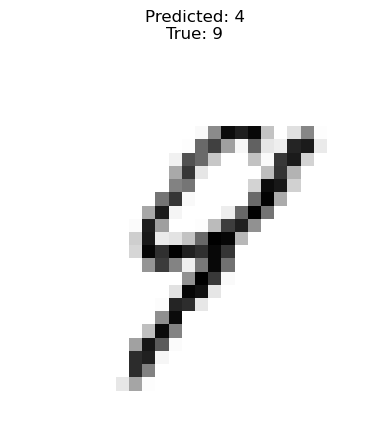

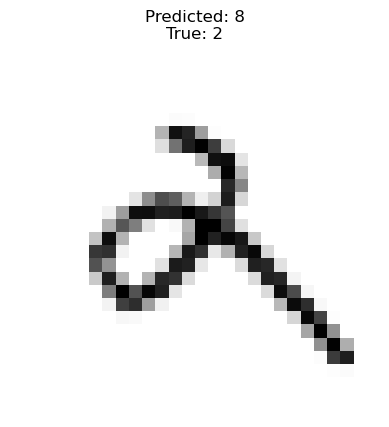

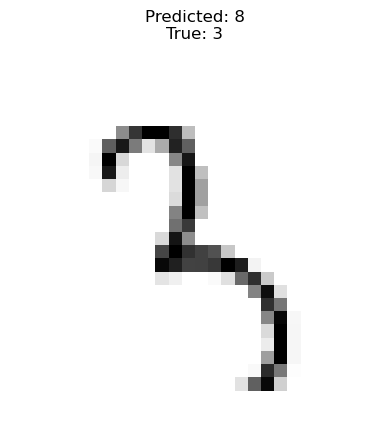

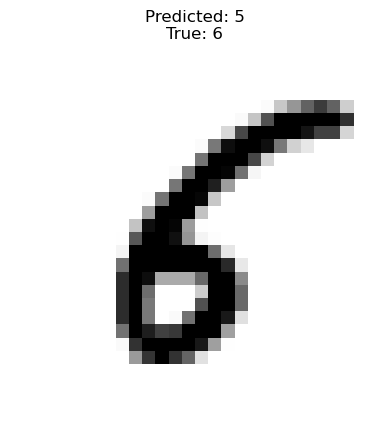

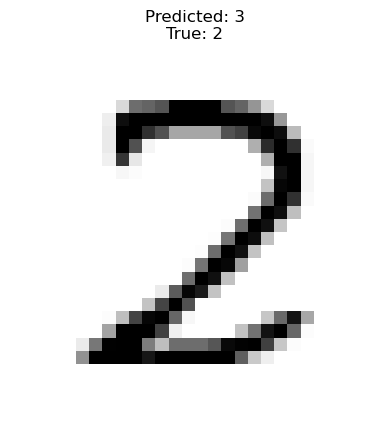

In [39]:
#Finding the indices of misclassified images
misclassified_indices = np.where(predicted_labels != test_labels)[0]

#Setting the number of misclassified images to plot
num_misclassified_to_plot = min(5, len(misclassified_indices))

#Plotting the misclassified images
for i in range(num_misclassified_to_plot):
    index = misclassified_indices[i]
    predicted_label = predicted_labels[index]
    true_label = test_labels[index]

    #Reshaping the flattened image to its original shape
    misclassified_image = test_images[index, :].reshape(28,28)
    plt.imshow(misclassified_image, cmap='binary')
    plt.title(f"Predicted: {predicted_labels[index]}\nTrue: {true_label}")
    plt.axis('off')
    
    #Displaying the plot
    plt.show()